In [1]:
import numpy as np
import pandas as pd

In [2]:
match = pd.read_csv('/content/matches.csv')
delivery = pd.read_csv('/content/deliveries.csv')

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.shape

(756, 18)

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [6]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [7]:
total_score_df = total_score_df[total_score_df['inning'] == 2]

In [8]:
total_score_df

,match_id,inning,total_runs
1,1,2,172.0
3,2,2,187.0
5,3,2,184.0
7,4,2,164.0
9,5,2,142.0
...,...,...,...
1046,518,2,170.0
1048,519,2,149.0
1050,520,2,136.0
1052,521,2,164.0


In [9]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [10]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,172.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,187.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,518,IPL-2015,Kolkata,08-04-2015,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,M Morkel,Eden Gardens,S Ravi,C Shamshuddin,NaN,518,170.0
517,519,IPL-2015,Chennai,09-04-2015,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Chennai Super Kings,1,0,A Nehra,"MA Chidambaram Stadium, Chepauk",RK Illingworth,VA Kulkarni,NaN,519,149.0
518,520,IPL-2015,Pune,10-04-2015,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,26,0,JP Faulkner,Maharashtra Cricket Association Stadium,SD Fry,CB Gaffaney,NaN,520,136.0
519,521,IPL-2015,Chennai,11-04-2015,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,normal,0,Chennai Super Kings,45,0,BB McCullum,"MA Chidambaram Stadium, Chepauk",RK Illingworth,VA Kulkarni,NaN,521,164.0


In [12]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [13]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [14]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [15]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [16]:
match_df.shape

(435, 20)

In [20]:
# Check if the column 'dl_applied' exists in your DataFrame.
if 'dl_applied' in match_df.columns:
    # If it exists, proceed with the filtering.
    match_df = match_df[match_df['dl_applied'] == 0]
else:
    # If not, print a message or handle the case accordingly.
    print("Column 'dl_applied' not found in DataFrame.")
    # You might need to load the correct data or adjust your code to work without this column

Column 'dl_applied' not found in DataFrame.


In [17]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [21]:
delivery_df = match_df.merge(delivery,on='match_id')

In [22]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [23]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103422,522,Kolkata,Royal Challengers Bangalore,179.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,19.0,2.0,CH Gayle,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,CH Gayle,run out,MK Pandey
103423,522,Kolkata,Royal Challengers Bangalore,179.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,19.0,3.0,AN Ahmed,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
103424,522,Kolkata,Royal Challengers Bangalore,179.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,19.0,4.0,HV Patel,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
103425,522,Kolkata,Royal Challengers Bangalore,179.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,19.0,5.0,HV Patel,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN


In [ ]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

NotImplementedError: function is not implemented for this dtype: [how->cumsum,dtype->object]

In [24]:
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [25]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [26]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [27]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,171.0,119.0
126,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,171.0,118.0
127,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,171.0,117.0
128,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0,169.0,116.0
129,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0,165.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103422,522,Kolkata,Royal Challengers Bangalore,179.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,19.0,2.0,CH Gayle,...,0.0,1.0,0.0,1.0,CH Gayle,run out,MK Pandey,171.0,8.0,10.0
103423,522,Kolkata,Royal Challengers Bangalore,179.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,19.0,3.0,AN Ahmed,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,172.0,7.0,9.0
103424,522,Kolkata,Royal Challengers Bangalore,179.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,19.0,4.0,HV Patel,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,174.0,5.0,8.0
103425,522,Kolkata,Royal Challengers Bangalore,179.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,19.0,5.0,HV Patel,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,175.0,4.0,7.0


In [28]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,1.0,0.0,1.0,0,NaN,NaN,1.0,171.0,119.0,10
126,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,171.0,118.0,10
127,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,171.0,117.0,10
128,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,2.0,0.0,2.0,0,NaN,NaN,3.0,169.0,116.0,10
129,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,4.0,0.0,4.0,0,NaN,NaN,7.0,165.0,115.0,10


In [29]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
# Ensure 'player_dismissed' is numeric before grouping
# This ensures the groupby operation is performed on numeric data
wickets = delivery_df.groupby('match_id')['player_dismissed'].transform('cumsum') # changed cumsum to transform('cumsum')
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,1.0,0.0,1.0,1,NaN,NaN,1.0,171.0,119.0,9
126,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,1,NaN,NaN,1.0,171.0,118.0,8
127,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,1,NaN,NaN,1.0,171.0,117.0,7
128,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,2.0,0.0,2.0,1,NaN,NaN,3.0,169.0,116.0,6
129,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,4.0,0.0,4.0,1,NaN,NaN,7.0,165.0,115.0,5


In [30]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,1.0,0.0,1.0,1,NaN,NaN,1.0,171.0,119.0,9
126,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,1,NaN,NaN,1.0,171.0,118.0,8
127,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,1,NaN,NaN,1.0,171.0,117.0,7
128,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,2.0,0.0,2.0,1,NaN,NaN,3.0,169.0,116.0,6
129,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,4.0,0.0,4.0,1,NaN,NaN,7.0,165.0,115.0,5


In [31]:
# Assuming 'total_balls_remaining' represents the balls remaining in the innings
delivery_df['total_balls_remaining'] = (delivery_df['balls_left']*6) + delivery_df['over'] + 1
#Calculating balls remaining using overs and balls delivered
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/delivery_df['balls_left']

In [32]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [33]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,total_balls_remaining,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,1,NaN,NaN,1.0,171.0,119.0,9,716.0,0.050420,8.621849
126,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,1,NaN,NaN,1.0,171.0,118.0,8,710.0,0.050847,8.694915
127,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,1,NaN,NaN,1.0,171.0,117.0,7,704.0,0.051282,8.769231
128,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,1,NaN,NaN,3.0,169.0,116.0,6,698.0,0.155172,8.741379
129,1,Hyderabad,Sunrisers Hyderabad,172.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,1,NaN,NaN,7.0,165.0,115.0,5,692.0,0.365217,8.608696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103422,522,Kolkata,Royal Challengers Bangalore,179.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,19.0,2.0,CH Gayle,...,1,run out,MK Pandey,171.0,8.0,10.0,-101,80.0,102.600000,4.800000
103423,522,Kolkata,Royal Challengers Bangalore,179.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,19.0,3.0,AN Ahmed,...,1,NaN,NaN,172.0,7.0,9.0,-102,74.0,114.666667,4.666667
103424,522,Kolkata,Royal Challengers Bangalore,179.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,19.0,4.0,HV Patel,...,1,NaN,NaN,174.0,5.0,8.0,-103,68.0,130.500000,3.750000
103425,522,Kolkata,Royal Challengers Bangalore,179.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,19.0,5.0,HV Patel,...,1,NaN,NaN,175.0,4.0,7.0,-104,62.0,150.000000,3.428571


In [34]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [35]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [36]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [37]:
final_df = final_df.sample(final_df.shape[0])

In [38]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
97338,Kolkata Knight Riders,Mumbai Indians,Cuttack,93.0,80.0,-32,142.0,3.675,6.975,1


In [39]:
final_df.isnull().sum()

,0
batting_team,0
bowling_team,0
city,832
runs_left,0
balls_left,0
wickets,0
total_runs_x,0
crr,0
rrr,133
result,0


In [40]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
30598,Royal Challengers Bangalore,Chennai Super Kings,Durban,29.0,19.0,-93,132.0,32.526316,9.157895,1
57045,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,7.0,50.0,-63,105.0,11.760000,0.840000,1
75703,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,138.0,92.0,-19,158.0,1.304348,9.000000,1
51136,Royal Challengers Bangalore,Chennai Super Kings,Chennai,78.0,49.0,-63,162.0,10.285714,9.551020,0
81490,Delhi Daredevils,Kolkata Knight Riders,Raipur,134.0,113.0,3,137.0,0.159292,7.115044,1
...,...,...,...,...,...,...,...,...,...,...
74537,Chennai Super Kings,Mumbai Indians,Chennai,48.0,32.0,-80,139.0,17.062500,9.000000,0
31239,Chennai Super Kings,Mumbai Indians,Port Elizabeth,151.0,119.0,9,151.0,0.000000,7.613445,1
67944,Kings XI Punjab,Rajasthan Royals,Chandigarh,97.0,82.0,-31,134.0,2.707317,7.097561,0
22354,Chennai Super Kings,Delhi Daredevils,Durban,3.0,5.0,-110,180.0,212.400000,3.600000,0


In [41]:
final_df.isnull().sum()

,0
batting_team,0
bowling_team,0
city,832
runs_left,0
balls_left,0
wickets,0
total_runs_x,0
crr,0
rrr,133
result,0


In [42]:
final_df = final_df.sample(final_df.shape[0])

In [43]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
58606,Mumbai Indians,Kolkata Knight Riders,Kolkata,154.0,103.0,-7,178.0,1.398058,8.970874,1


In [44]:
final_df.dropna(inplace=True)

In [45]:
final_df = final_df[final_df['balls_left'] != 0]

In [46]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [47]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
75765,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,43.0,35.0,-81,158.0,19.714286,7.371429
9274,Rajasthan Royals,Deccan Chargers,Hyderabad,92.0,50.0,-61,217.0,15.000000,11.040000
46112,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,63.0,77.0,-33,132.0,5.376623,4.909091
48272,Deccan Chargers,Chennai Super Kings,Mumbai,72.0,74.0,-36,104.0,2.594595,5.837838
30305,Deccan Chargers,Delhi Daredevils,Durban,94.0,71.0,-42,161.0,5.661972,7.943662
...,...,...,...,...,...,...,...,...,...
82406,Kings XI Punjab,Royal Challengers Bangalore,Bangalore,166.0,112.0,0,176.0,0.535714,8.892857
45460,Royal Challengers Bangalore,Deccan Chargers,Nagpur,33.0,26.0,-88,138.0,24.230769,7.615385
79369,Mumbai Indians,Kolkata Knight Riders,Kolkata,70.0,45.0,-65,162.0,12.266667,9.333333
66247,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,112.0,96.0,-15,143.0,1.937500,7.000000


Change syntax as a reference of gimini

In [48]:
!pip install --upgrade scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Remove the 'sparse' argument from OneHotEncoder
trf = ColumnTransformer([
    ('trf',OneHotEncoder(drop='first', handle_unknown='ignore'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [50]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [51]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [52]:
y_pred = pipe.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6750895140664962

In [54]:
pipe.predict_proba(X_test)[10]

array([0.90864056, 0.09135944])

In [55]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [56]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [57]:
temp_df,target = match_progression(delivery_df,1,pipe)
temp_df

Target- 172.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
130,1,11.0,6,31.1,68.9
136,2,1.0,6,35.8,64.2
142,3,16.0,6,30.8,69.2
148,4,11.0,6,29.2,70.8
155,5,5.0,7,31.0,69.0
162,6,10.0,7,29.7,70.3
168,7,7.0,6,30.5,69.5
174,8,13.0,6,27.7,72.3
180,9,10.0,6,26.7,73.3
187,10,10.0,7,25.5,74.5


Text(0.5, 1.0, 'Target-172.0')

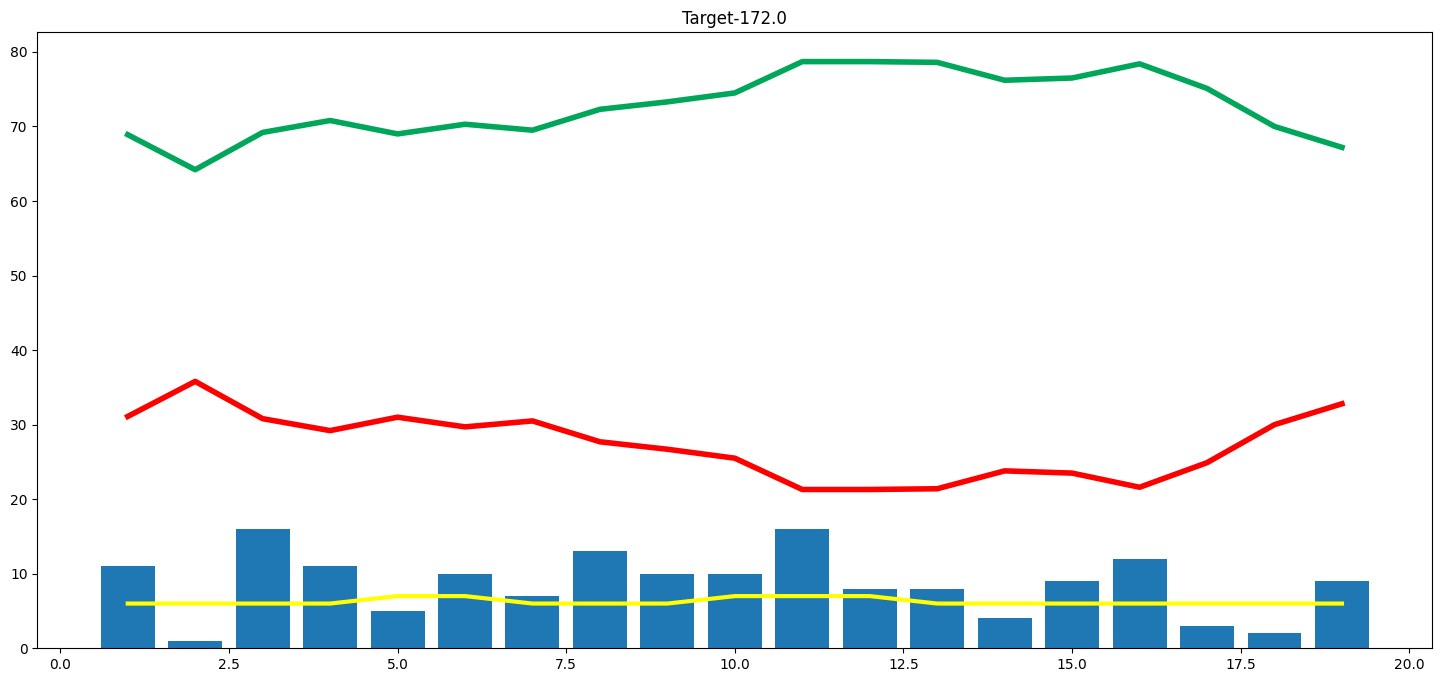

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [60]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [59]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan], dtype=object)

In [61]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.pipeline import Pipeline

# Update pipeline with SVM
pipe_svm = Pipeline(steps=[
    ('step1', trf),  # Preprocessing step
    ('step2', SVC(probability=True))  # Use probability=True for predict_proba
])

# Train the SVM model
pipe_svm.fit(X_train, y_train)

# Evaluate the SVM model
y_pred_svm = pipe_svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Update pipeline with Decision Tree
pipe_dt = Pipeline(steps=[
    ('step1', trf),  # Preprocessing step
    ('step2', DecisionTreeClassifier(random_state=1))  # Decision Tree
])

# Train the Decision Tree model
pipe_dt.fit(X_train, y_train)

# Evaluate the Decision Tree model
y_pred_dt = pipe_dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))